<a href="https://colab.research.google.com/github/shashank-s99/Capstone-project---EDA---AirBnb-Bookings-Analysis/blob/main/Individual_notebook_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Questions for Analysis:**

1- What is the relationship between the price of an Airbnb listing and the number of reviews it has?

2- What are the most popular amenities offered by Airbnb hosts and how do they affect the price and ratings of the listings?

3- How does the average length of stay vary by guest nationality?

4- What are the most popular neighborhoods for Airbnb bookings?


#1- Know your data

##Import libraries

In [1]:
# Import Libraries
import numpy as np
import pandas as pd
from numpy import math
from numpy import loadtxt
import seaborn as sns
import matplotlib.pyplot as plt

##Dataset Loading

In [2]:
# Load Dataset
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
path = "/content/drive/MyDrive/CAPSTONE PROJECTS - AB/CAPSTONE PROJECT 2 - EDA/Airbnb NYC 2019.csv"
data_set = pd.read_csv(path)


##Dataset First View

In [6]:
#First 5 rows of Dataset
data_set.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [16]:
# Columns with null value
data_set.isnull().sum()

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

##Dataset Rows & Columns count

In [35]:
# Rows & Columns in Dataset
data_set.shape


(48895, 16)

##Dataset Information

In [36]:
# Dataset info
data_set.info

<bound method DataFrame.info of              id                                               name   host_id  \
0          2539                 Clean & quiet apt home by the park      2787   
1          2595                              Skylit Midtown Castle      2845   
2          3647                THE VILLAGE OF HARLEM....NEW YORK !      4632   
3          3831                    Cozy Entire Floor of Brownstone      4869   
4          5022   Entire Apt: Spacious Studio/Loft by central park      7192   
...         ...                                                ...       ...   
48890  36484665    Charming one bedroom - newly renovated rowhouse   8232441   
48891  36485057      Affordable room in Bushwick/East Williamsburg   6570630   
48892  36485431            Sunny Studio at Historical Neighborhood  23492952   
48893  36485609               43rd St. Time Square-cozy single bed  30985759   
48894  36487245  Trendy duplex in the very heart of Hell's Kitchen  68119814   

       

##Duplicate values

In [37]:
# Count of duplicate values in Dataset
len(data_set[data_set.duplicated()])

0

##Missing/Null values

In [21]:
# Missing/Null Values Count
print(data_set.isnull().sum())

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64


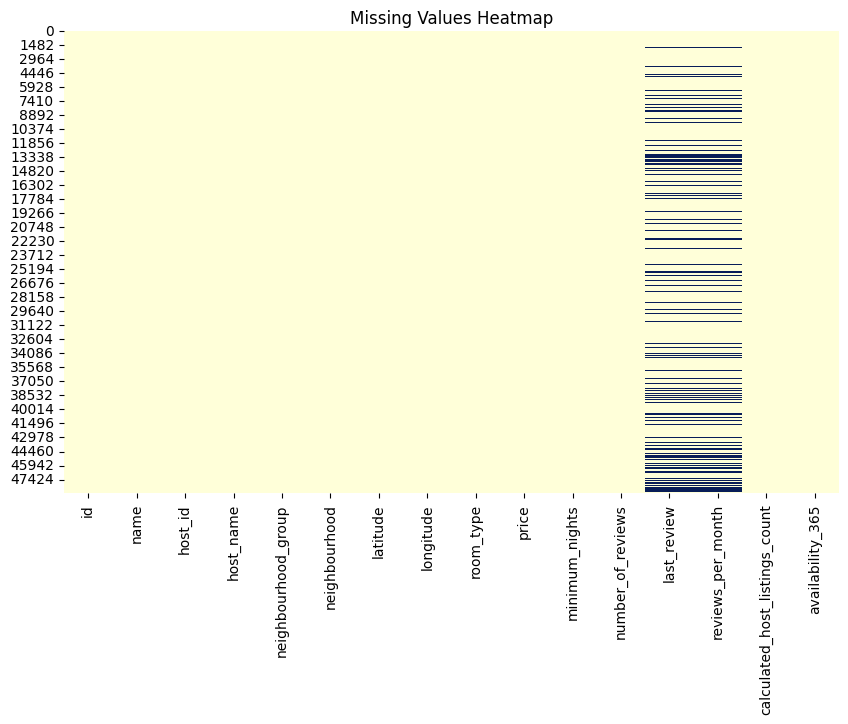

In [38]:
# Visualizing the missing values through heatmap

plt.figure(figsize=(10, 6))
sns.heatmap(data_set.isnull(), cbar=False, cmap='YlGnBu')
plt.title('Missing Values Heatmap')
plt.show()

**About the Dataset:**

The dataset under scrutiny encompasses a treasure trove of data extracted from Airbnb's New York City operations during the year 2019. With close to 49,000 entries distributed across 16 columns, this dataset offers a multifaceted glimpse into the world of short-term rentals. It amalgamates a diverse array of both categorical and numerical variables, painting a vivid picture of the Airbnb ecosystem within the bustling metropolis of New York. This dataset serves as a valuable resource for conducting in-depth analyses, unveiling hidden trends, and extracting meaningful insights that can inform strategic decisions in the ever-evolving landscape of the hospitality industry.

**Project Objectives:**

Our analysis focuses on key aspects, such as host behavior, neighborhood dynamics, pricing strategies, and customer reviews. These insights will not only enhance our understanding of Airbnb's impact but also assist in making data-driven decisions within the hospitality sector.

#2- Understanding your variables

In [26]:
# Dataset Columns
data_set.columns

Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365'],
      dtype='object')

In [39]:
# Descriptive statistics of a DataFrame
data_set.describe(include = 'all')

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
count,4.889500e+04,48879,4.889500e+04,48874,48895,48895,48895.000000,48895.000000,48895,48895.000000,48895.000000,48895.000000,38843,38843.000000,48895.000000,48895.000000
unique,NaN,47905,NaN,11452,5,221,NaN,NaN,3,NaN,NaN,NaN,1764,NaN,NaN,NaN
top,NaN,Hillside Hotel,NaN,Michael,Manhattan,Williamsburg,NaN,NaN,Entire home/apt,NaN,NaN,NaN,2019-06-23,NaN,NaN,NaN
freq,NaN,18,NaN,417,21661,3920,NaN,NaN,25409,NaN,NaN,NaN,1413,NaN,NaN,NaN
mean,1.901714e+07,NaN,6.762001e+07,NaN,NaN,NaN,40.728949,-73.952170,NaN,152.720687,7.029962,23.274466,NaN,1.373221,7.143982,112.781327
std,1.098311e+07,NaN,7.861097e+07,NaN,NaN,NaN,0.054530,0.046157,NaN,240.154170,20.510550,44.550582,NaN,1.680442,32.952519,131.622289
min,2.539000e+03,NaN,2.438000e+03,NaN,NaN,NaN,40.499790,-74.244420,NaN,0.000000,1.000000,0.000000,NaN,0.010000,1.000000,0.000000
25%,9.471945e+06,NaN,7.822033e+06,NaN,NaN,NaN,40.690100,-73.983070,NaN,69.000000,1.000000,1.000000,NaN,0.190000,1.000000,0.000000
50%,1.967728e+07,NaN,3.079382e+07,NaN,NaN,NaN,40.723070,-73.955680,NaN,106.000000,3.000000,5.000000,NaN,0.720000,1.000000,45.000000
75%,2.915218e+07,NaN,1.074344e+08,NaN,NaN,NaN,40.763115,-73.936275,NaN,175.000000,5.000000,24.000000,NaN,2.020000,2.000000,227.000000


##Check Unique Values for each variable.

In [40]:
# Check Unique Values for each variable/column.
for i in data_set.columns.tolist():
  print("no of unique values in",i,"is",data_set[i].nunique(),".")

no of unique values in id is 48895 .
no of unique values in name is 47905 .
no of unique values in host_id is 37457 .
no of unique values in host_name is 11452 .
no of unique values in neighbourhood_group is 5 .
no of unique values in neighbourhood is 221 .
no of unique values in latitude is 19048 .
no of unique values in longitude is 14718 .
no of unique values in room_type is 3 .
no of unique values in price is 674 .
no of unique values in minimum_nights is 109 .
no of unique values in number_of_reviews is 394 .
no of unique values in last_review is 1764 .
no of unique values in reviews_per_month is 937 .
no of unique values in calculated_host_listings_count is 47 .
no of unique values in availability_365 is 366 .


#3- Data Wrangling

##Data wrangling code

In [29]:
# Creating a copy of the current dataset and assigning to df
df= data_set.copy()

In [41]:
# Finding number of customers
customers_df = df[df['host_id'] != df['id']]
customer_count = len(customers_df)

print("Number of customers on Airbnb: - ", customer_count)


Number of customers on Airbnb: -  48895


In [45]:
# Replacing missing values with zero in 'reviews_per_month' column
data_set.fillna({'reviews_per_month':0},inplace=True)